<a href="https://colab.research.google.com/github/madenni/NN-DIP/blob/main/NS2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание №1. Нейросеть для California housing

Будем работать с набором данным `fetch_california_housing` из `sklearn`.

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import classification_report
import pandas as pd
import plotly.graph_objects as go
import math
import numpy as np
import tensorflow

data = fetch_california_housing()

X = pd.DataFrame(data['data'], columns=data['feature_names'])
y = data['target']

X.head(n=10)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25


In [ ]:
y

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

#### 1.1. Разбейте данные на обучение и тест

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size=0.2, random_state=125)
X_train.shape, X_test.shape

((16512, 8), (4128, 8))

#### 1.2. Создайте архитектуру для этой задачи

In [ ]:
mean = X_train.mean(axis=0)
std = X_train.std(axis=0)

X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

model.add(Dense(128, input_shape=(8, ), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='linear'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1152      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 9,473
Trainable params: 9,473
Non-trainable params: 0
_________________________________________________________________


#### 1.3. Скомпилируйте сеть

Подберите нужную функцию потерь и метрику. Оптимизатор можете использовать 'sgd'

In [ ]:
model.compile(optimizer='sgd', loss='mse', metrics='mae')

#### 1.4. Обучите нейросеть

Выберите нужное количество эпох.


In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)
history

Epoch 1/100
516/516 [==============================] - 1s 2ms/step - loss: 0.7024 - mae: 0.5824 - val_loss: 0.4834 - val_mae: 0.4905
Epoch 2/100
516/516 [==============================] - 1s 1ms/step - loss: 0.4519 - mae: 0.4798 - val_loss: 0.4260 - val_mae: 0.4716
Epoch 3/100
516/516 [==============================] - 1s 1ms/step - loss: 0.4217 - mae: 0.4607 - val_loss: 0.4047 - val_mae: 0.4575
Epoch 4/100
516/516 [==============================] - 1s 2ms/step - loss: 0.4054 - mae: 0.4487 - val_loss: 0.3854 - val_mae: 0.4424
Epoch 5/100
516/516 [==============================] - 1s 2ms/step - loss: 0.3873 - mae: 0.4382 - val_loss: 0.3769 - val_mae: 0.4444
Epoch 6/100
516/516 [==============================] - 1s 2ms/step - loss: 0.3756 - mae: 0.4312 - val_loss: 0.3736 - val_mae: 0.4513
Epoch 7/100
516/516 [==============================] - 1s 2ms/step - loss: 0.3679 - mae: 0.4261 - val_loss: 0.3563 - val_mae: 0.4213
Epoch 8/100
516/516 [==============================] - 1s 1ms/step - 

#### 1.5. Сделайте вывод, хорошо ли модель обучается?

Модель обучается достаточно хорошо

In [ ]:
import cv2
import matplotlib.pyplot as plt
import matplotlib
matplotlib.use('TkAgg')

N = np.arange(0, 100)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, history.history["loss"], label="train_loss")
plt.plot(N, history.history["val_loss"], label="val_loss")
plt.plot(N, history.history["mae"], label="train_mae")
plt.plot(N, history.history["val_mae"], label="val_mae")
plt.title("Training Loss and MAE (Simple NN)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/MAE")
plt.legend()
plt.savefig('plot.png')
#plt.imshow(cv2.imread("plot.png"))
plt.show()

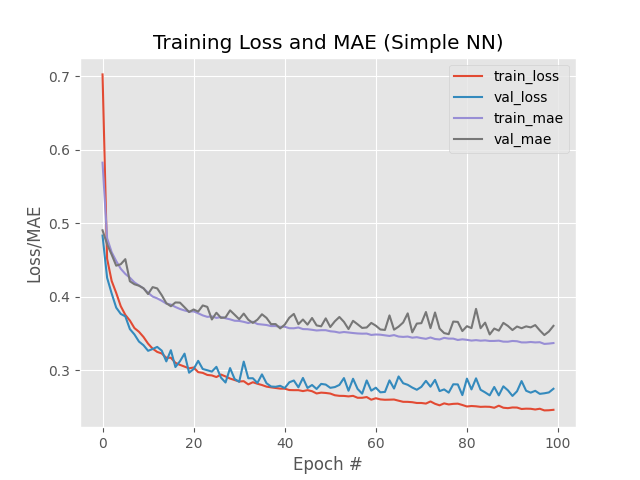

#### 1.6. Сделайте предсказания на тестовых данных

In [ ]:
predictions = model.predict(X_test)
print(predictions)

129/129 [==============================] - 0s 966us/step
[[3.343301 ]
 [4.6663427]
 [1.3757695]
 ...
 [2.782534 ]
 [1.6257576]
 [1.6909328]]


In [ ]:
df2 = pd.DataFrame(y_test, columns = ['true'])
df3 = pd.DataFrame(predictions, columns = ['pred'])

In [ ]:
result = pd.concat([df2, df3], axis=1)
result.head(10)

,true,pred
0,3.66300,3.343301
1,5.00001,4.666343
2,1.07600,1.375769
3,3.44800,2.808790
4,2.48200,2.798569
5,2.25800,2.380489
6,2.31900,2.154265
7,2.53700,2.867242
8,1.80000,1.917452
9,2.99400,2.769665


#### 1.7. Посчитайте метрику качества на тестовых данных

In [ ]:
mse_nn, mae_nn = model.evaluate(X_test, y_test)
print('Mean squared error on test data: ', mse_nn)
print('Mean absolute error on test data: ', mae_nn)

129/129 [==============================] - 0s 1ms/step - loss: 0.2751 - mae: 0.3607
Mean squared error on test data:  0.27514877915382385
Mean absolute error on test data:  0.36066314578056335


# Задание 2. Обучение нейронной сети для классификации изображений, используя свой датасет

In [1]:
import matplotlib
matplotlib.use("Agg")

In [2]:
# Подключаем необходимые модули и пакеты
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import random
import pickle
import cv2
import os

In [106]:
data = []
labels = []

In [107]:
# Собираем список путей к каждому изображению и перемешиваем их
imagePaths = sorted(list(paths.list_images("C:/Users/User/Documents/GitHub/NeuralNetworks")))

random.shuffle(imagePaths)

In [108]:
# цикл по изображениям
for imagePath in imagePaths:
	
	image = cv2.imread(imagePath) # загружаем изображение
	image = cv2.resize(image, (64, 64)).flatten() # меняем его разрешение на 32x32 пикселей (без учета соотношения сторон),
																								# сглаживаем его в 32x32x3=3072 пикселей
	data.append(image) # добавляем в список

	label = imagePath.split(os.path.sep)[-2] 	# извлекаем метку класса из пути к изображению (метка класса зависит от имени папки)
	labels.append(label) # обновляем список меток

In [109]:
# масштабируем интенсивности пикселей в диапазон [0, 1] (Нормализация данных)
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

In [110]:
len(data)

6000

In [111]:
# разбиваем данные на обучающую и тестовую выборки, используя 75%
# данных для обучения и оставшиеся 25% для тестирования
(trainX, testX, trainY, testY) = train_test_split(data,
	labels, test_size=0.25, random_state=42)

In [112]:
# конвертируем метки из целых чисел в векторы (для 2х классов при
# бинарной классификации вам следует использовать функцию Keras
# "to_categorical" вместо "LabelBinarizer" из scikit-learn, которая не возвращает вектор)
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

print('Train: X = ', trainX.shape)
print('Test: X = ', testX.shape)

Train: X =  (4500, 12288)
Test: X =  (1500, 12288)


In [113]:
# определим архитектуру 3072-1024-512-3 с помощью Keras
model = Sequential()
model.add(Dense(1024, input_shape=(12288, ), activation="relu"))
model.add(Dense(512, activation="relu"))
model.add(Dense(len(lb.classes_), activation="softmax"))

In [114]:
# инициализируем скорость обучения и общее число эпох
INIT_LR = 0.02
EPOCHS = 100

In [115]:
# компилируем модель, используя SGD как оптимизатор и категориальную
# кросс-энтропию в качестве функции потерь (для бинарной классификации
# следует использовать binary_crossentropy)

opt = SGD(learning_rate=INIT_LR)
model.compile(loss="categorical_crossentropy", optimizer=opt,
	metrics=["accuracy"])

In [116]:
# обучаем нейросеть
H = model.fit(trainX, trainY, validation_data=(testX, testY),
	epochs=EPOCHS, batch_size=2000)

Epoch 1/100
3/3 [==============================] - 3s 1s/step - loss: 1.6707 - accuracy: 0.3424 - val_loss: 3.5946 - val_accuracy: 0.3327
Epoch 2/100
3/3 [==============================] - 2s 814ms/step - loss: 2.2869 - accuracy: 0.3560 - val_loss: 1.1011 - val_accuracy: 0.4367
Epoch 3/100
3/3 [==============================] - 3s 666ms/step - loss: 1.0811 - accuracy: 0.4331 - val_loss: 1.1559 - val_accuracy: 0.3620
Epoch 4/100
3/3 [==============================] - 2s 690ms/step - loss: 1.1331 - accuracy: 0.3653 - val_loss: 1.0552 - val_accuracy: 0.4327
Epoch 5/100
3/3 [==============================] - 2s 741ms/step - loss: 1.0362 - accuracy: 0.4736 - val_loss: 1.0198 - val_accuracy: 0.5267
Epoch 6/100
3/3 [==============================] - 3s 1s/step - loss: 1.0058 - accuracy: 0.5329 - val_loss: 1.0029 - val_accuracy: 0.5420
Epoch 7/100
3/3 [==============================] - 3s 789ms/step - loss: 0.9837 - accuracy: 0.5549 - val_loss: 0.9903 - val_accuracy: 0.5507
Epoch 8/100
3/3 [==

In [117]:
# оцениваем нейросеть
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
47/47 [==============================] - 1s 11ms/step
              precision    recall  f1-score   support

   Butterfly       0.72      0.67      0.70       489
         Cow       0.60      0.72      0.65       512
       Tiger       0.64      0.55      0.60       499

    accuracy                           0.65      1500
   macro avg       0.65      0.65      0.65      1500
weighted avg       0.65      0.65      0.65      1500



In [118]:
# строим графики потерь и точности
N = np.arange(0, EPOCHS)
matplotlib.use('TkAgg')
plt.style.use("ggplot")
plt.figure()
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.plot(N, H.history["accuracy"], label="train_acc")
plt.plot(N, H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy (Simple NN)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig('plot.png')
#cv2_imshow(cv2.imread("plot.png"))
plt.show()

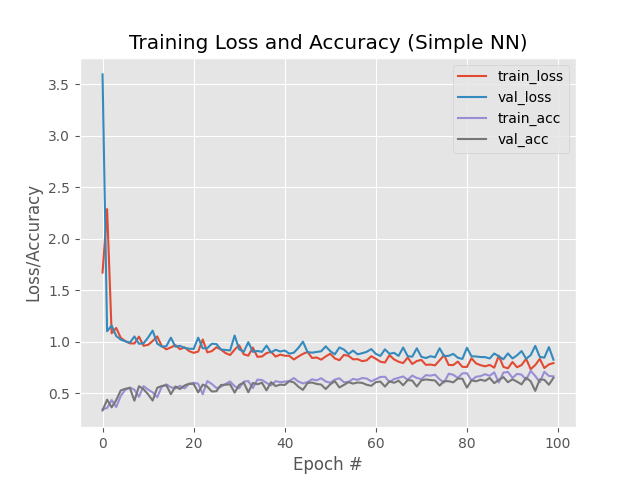

In [119]:
# сохраняем модель и метки классов в бинарном представлении на диск
print("[INFO] serializing network and label binarizer...")
model.save("model.h5", save_format="h5")
f = open("label_bin", "wb")
f.write(pickle.dumps(lb))
f.close()

[INFO] serializing network and label binarizer...


## Проверка обученной модели пользовательскими данными

In [120]:
from keras.models import load_model
import argparse
import pickle
import cv2
import matplotlib.pyplot as plt

In [129]:
# загружаем входное изображение, меняем его размер на необходимый и выводим его
image = cv2.imread('C:/Users/User/Desktop/datatest/Cow/Cow-Test (20).jpeg')
output = image.copy()
image = cv2.resize(image, (64, 64))


In [130]:
# "Выравниваем" изображение (преобразуем его в вектор. Из 32х32х3 -> 3072)
image = image.flatten()
# масштабируем значения пикселей к диапазону [0, 1]
image = image.astype("float") / 255.0
image = image.reshape((1, image.shape[0]))

In [131]:
# загружаем модель и бинаризатор меток
from keras import models    
print("[INFO] loading network and label binarizer...")
model = models.load_model("model.h5")
lb = pickle.loads(open("label_bin", "rb").read())

[INFO] loading network and label binarizer...


In [132]:
# делаем предсказание на изображении
preds = model.predict(image)
print(preds)

1/1 [==============================] - 0s 57ms/step
[[0.25177887 0.447063   0.3011582 ]]


In [133]:
# находим индекс метки класса с наибольшей вероятностью
# соответствия
i = preds.argmax(axis=1)[0]
label = lb.classes_[i]

In [134]:
# Добавляем на исходное изображение метку класса и вероятность прогноза
text = "{}: {:.2f}%".format(label, preds[0][i] * 100)
cv2.putText(output, text, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7,
	(0, 0, 255), 2)

array([[[ 61, 124, 114],
        [ 56, 119, 109],
        [ 59, 121, 109],
        ...,
        [ 36,  61,  57],
        [ 58,  85,  82],
        [ 13,  40,  37]],

       [[ 62, 125, 115],
        [ 65, 128, 118],
        [ 67, 130, 120],
        ...,
        [ 28,  53,  49],
        [ 50,  77,  74],
        [ 20,  47,  44]],

       [[ 72, 137, 128],
        [ 78, 143, 134],
        [ 68, 133, 124],
        ...,
        [ 30,  57,  54],
        [ 50,  77,  74],
        [ 30,  57,  54]],

       ...,

       [[ 40,  36,  31],
        [ 43,  39,  34],
        [ 48,  42,  37],
        ...,
        [ 16,  30,  49],
        [  6,  17,  37],
        [  0,   2,  22]],

       [[ 46,  42,  37],
        [ 49,  45,  40],
        [ 51,  45,  40],
        ...,
        [ 14,  28,  50],
        [ 29,  42,  64],
        [ 30,  43,  65]],

       [[ 50,  46,  41],
        [ 52,  48,  43],
        [ 53,  47,  42],
        ...,
        [ 26,  40,  62],
        [ 59,  72,  94],
        [ 69,  82, 104]]

In [135]:
# показываем выходное изображение
plt.imshow(output)
plt.show()

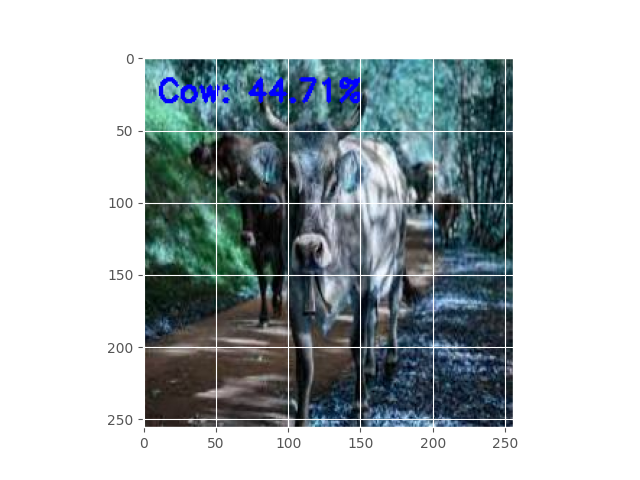